<a href="https://colab.research.google.com/github/Akshaya150105/Marketing-Analytics-/blob/main/Analysis_on_customer_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df=pd.read_csv('file.csv')

In [ ]:
segments=df.groupby(['Income Group','Age Group']).agg(avg_freq=('Purchase Frequency (Monthly)','mean'),avg_spend=('Purchase Frequency (Monthly)','mean')).reset_index()

In [ ]:
segments

,Income Group,Age Group,avg_freq,avg_spend
0,High Income,35-44,7.0,7.0
1,Low Income,18-24,3.0,3.0
2,Low Income,55+,2.0,2.0
3,Middle Income,25-34,5.0,5.0
4,Middle Income,45-54,4.0,4.0


In [ ]:
segments['total_spend'] = segments['avg_freq'] * segments['avg_spend']
most_profitable_segment = segments.loc[segments['total_spend'].idxmax()]

# Display the segment metrics
print(segments)
print("\nMost Profitable Segment:")
print(most_profitable_segment)

    Income Group Age Group  avg_freq  avg_spend  total_spend
0    High Income     35-44       7.0        7.0         49.0
1     Low Income     18-24       3.0        3.0          9.0
2     Low Income       55+       2.0        2.0          4.0
3  Middle Income     25-34       5.0        5.0         25.0
4  Middle Income     45-54       4.0        4.0         16.0

Most Profitable Segment:
Income Group    High Income
Age Group             35-44
avg_freq                7.0
avg_spend               7.0
total_spend            49.0
Name: 0, dtype: object


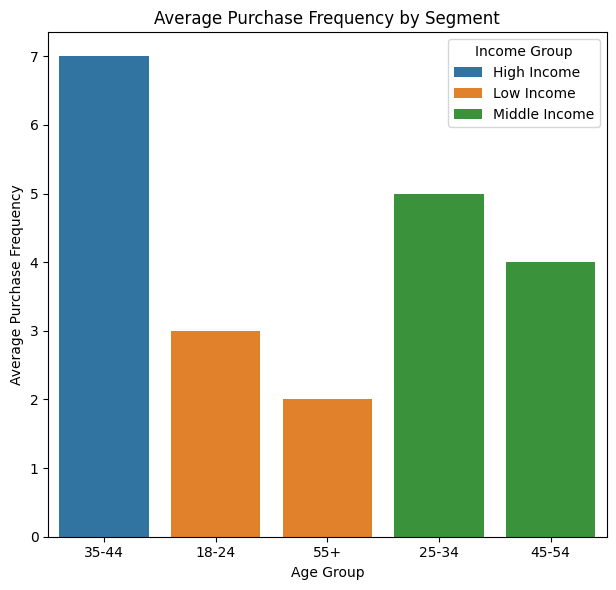

In [ ]:
plt.figure(figsize=(12, 6))

# Plot average purchase frequency
plt.subplot(1, 2, 1)
sns.barplot(x='Age Group', y='avg_freq', hue='Income Group', data=segments)
plt.title('Average Purchase Frequency by Segment')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Frequency')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Average Purchase Frequency')

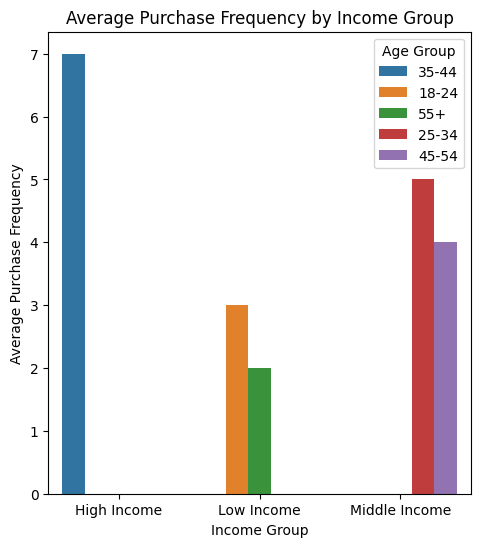

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Income Group', y='avg_freq', hue='Age Group', data=segments)
plt.title('Average Purchase Frequency by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Purchase Frequency')




In [ ]:
regional_summary=df.groupby('Region').agg({"Avg. Spend (₹)":"mean","Purchase Frequency (Monthly)":"mean","Population Estimate (Region)":"mean"}).reset_index()

In [ ]:
regional_summary["Avg Revenue per customer"]=(regional_summary["Avg. Spend (₹)"]*regional_summary["Purchase Frequency (Monthly)"])

In [ ]:
regional_summary["TAM"]=regional_summary["Avg Revenue per customer"]*regional_summary["Population Estimate (Region)"]

In [ ]:
regional_summary

,Region,Avg. Spend (₹),Purchase Frequency (Monthly),Population Estimate (Region),Avg Revenue per customer,TAM
0,East,2125.000000,4.416667,80000.0,9385.416667,7.508333e+08
1,North,1923.076923,3.923077,100000.0,7544.378698,7.544379e+08
2,South,1884.615385,4.000000,120000.0,7538.461538,9.046154e+08
3,West,2083.333333,4.500000,90000.0,9375.000000,8.437500e+08


In [ ]:
summary= regional_summary[["Region", "Avg Revenue per customer", "TAM"]].sort_values(
    by="TAM", ascending=False
)
print(summary)

  Region  Avg Revenue per customer           TAM
2  South               7538.461538  9.046154e+08
3   West               9375.000000  8.437500e+08
1  North               7544.378698  7.544379e+08
0   East               9385.416667  7.508333e+08


In [ ]:

overall_avg_monthly_spend = (
    df["Avg. Spend (₹)"] * df["Purchase Frequency (Monthly)"]
).mean()


regional_summary["TAM (Top-Down) (₹)"] = (
    regional_summary["Population Estimate (Region)"] * overall_avg_monthly_spend
)

summary= regional_summary[["Region", "TAM (Top-Down) (₹)"]].sort_values(
    by="TAM (Top-Down) (₹)", ascending=False
)
print(summary)


  Region  TAM (Top-Down) (₹)
2  South        1.140000e+09
1  North        9.500000e+08
3   West        8.550000e+08
0   East        7.600000e+08


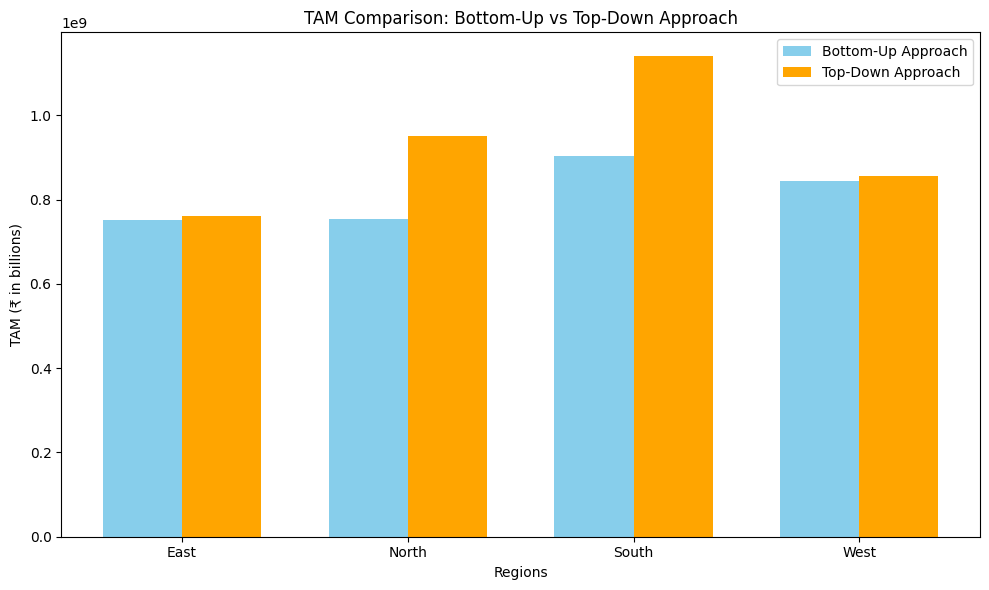

In [ ]:


regions = regional_summary["Region"]
tam_bottom_up = regional_summary["TAM"]
tam_top_down = regional_summary["TAM (Top-Down) (₹)"]


bar_width = 0.35
x = range(len(regions))

plt.figure(figsize=(10, 6))
plt.bar(x, tam_bottom_up, width=bar_width, label="Bottom-Up Approach", color="skyblue")
plt.bar([i + bar_width for i in x], tam_top_down, width=bar_width, label="Top-Down Approach", color="orange")

# Add labels and title
plt.xticks([i + bar_width / 2 for i in x], regions)
plt.xlabel("Regions")
plt.ylabel("TAM (₹ in billions)")
plt.title("TAM Comparison: Bottom-Up vs Top-Down Approach")
plt.legend()
plt.tight_layout()

# Show the visualization
plt.show()


In [ ]:
df["ROI (%)"] = ((df["Total Revenue (₹)"] - df["Campaign Cost (₹)"]) / df["Campaign Cost (₹)"]) * 100
campaign_roi = df.groupby("Campaign Type").agg({
    "ROI (%)": "mean"
}).reset_index()
campaign_roi = campaign_roi.sort_values(by="ROI (%)", ascending=False).reset_index(drop=True)

print(campaign_roi)

         Campaign Type       ROI (%)
0  Influencer Campaign  89471.428571
1     Referral Program  89000.000000
2     Social Media Ads  71900.000000
3       Email Campaign  39900.000000
4     TV Advertisement  39900.000000


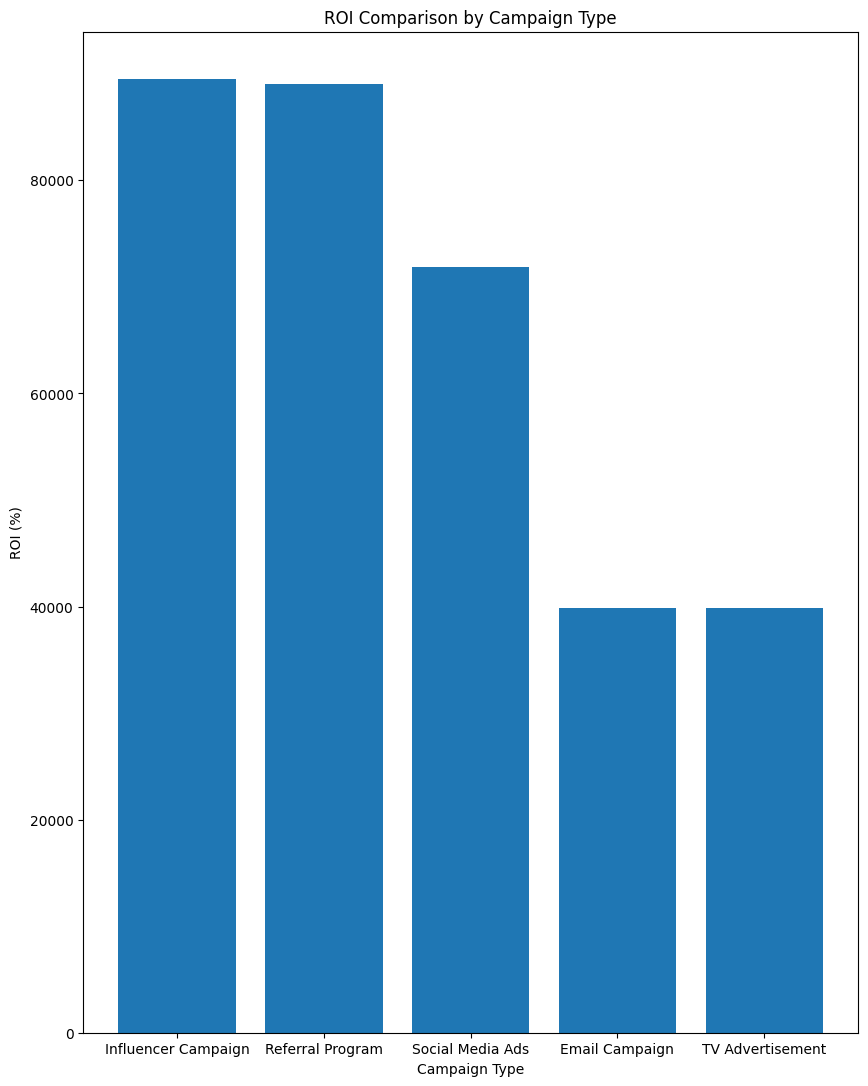

In [ ]:
plt.figure(figsize=(10,13))
plt.bar(campaign_roi["Campaign Type"],campaign_roi["ROI (%)"])
plt.xlabel("Campaign Type")
plt.ylabel("ROI (%)")
plt.title("ROI Comparison by Campaign Type")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = df[["Campaign Cost (₹)"]].values
y = df["Total Revenue (₹)"].values
model = LinearRegression()
model.fit(X, y)
intercept = model.intercept_
slope = model.coef_[0]
regression_eq = f"Revenue = {intercept:.2f} + {slope:.2f} * Campaign Cost"
new_campaign_costs = np.array([[100000], [200000], [300000]])
predicted_revenue = model.predict(new_campaign_costs)

In [ ]:
for cost, revenue in zip(new_campaign_costs.flatten(), predicted_revenue):
    print(f"Predicted Revenue for Campaign Cost ₹{cost}: ₹{revenue:.2f}")


Predicted Revenue for Campaign Cost ₹100000: ₹74721648.94
Predicted Revenue for Campaign Cost ₹200000: ₹153763138.30
Predicted Revenue for Campaign Cost ₹300000: ₹232804627.66


In [ ]:
r2_score = model.score(X, y)
print(f"R-squared: {r2_score:.2f}")


R-squared: 0.62
